In [ ]:
# Instalasi library Darknet
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15530, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15530 (delta 5), reused 12 (delta 4), pack-reused 15514
Receiving objects: 100% (15530/15530), 14.20 MiB | 16.52 MiB/s, done.
Resolving deltas: 100% (10418/10418), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
  253 |                 int n = _write(client, 

In [ ]:
# Download file weights pre-trained YOLO
!wget https://pjreddie.com/media/files/yolov3.weights
# Mendeteksi GPU yang tersedia
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show test.jpg

--2023-06-28 08:48:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.0MB/s    in 11s     

2023-06-28 08:48:16 (21.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595

In [ ]:
# Mengimpor library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
def detect_faces_yolo(image_path):
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Menjalankan deteksi YOLO
    !./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -thresh 0.25 -dont_show {image_path} -out result.txt

    # Membaca hasil deteksi dari file output
    with open('result.txt', 'r') as file:
        lines = file.readlines()

    # Membuat list untuk menyimpan bounding box wajah
    faces = []

    # Membaca setiap baris hasil deteksi
    for line in lines:
        line = line.strip()
        if line.startswith('person') or line.startswith('car') or line.startswith('bus'):
            _, confidence, left, top, width, height = line.split()
            left = int(float(left) * image_width)
            top = int(float(top) * image_height)
            width = int(float(width) * image_width)
            height = int(float(height) * image_height)
            right = left + width
            bottom = top + height
            faces.append((left, top, right, bottom))
            cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

    return faces, image

In [15]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    image_path = filename
    break

Saving 32.jpeg to 32.jpeg


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

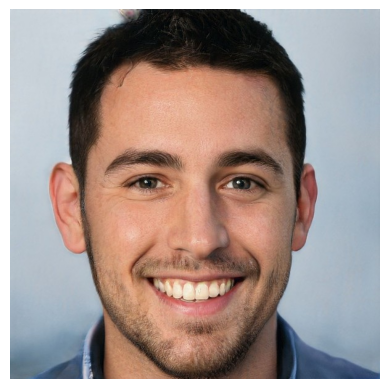

In [16]:
# pilih gambar
image_path = '32.jpeg'

# Memanggil fungsi
faces, image_with_boxes = detect_faces_yolo(image_path)

# Menampilkan gambar
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()